# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# clone project repository and install dependencies

#!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
#%pip install -r requirements.txt # install

import torch
import utils


/content/yolov5


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

  0%|          | 0.00/91.9M [00:00<?, ?B/s]

  0%|          | 0.00/170M [00:00<?, ?B/s]

# 1. Preparing Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package. 

All samples data where export from the HAM 10000 Dataset. 
Those data where manually anotated to detect the skin lesion and labeled with a malignant or benign annotations. 
All details of used data are found here. 

https://universe.roboflow.com/horizon-school-of-digital-technologies/skin-cancer-7hnpa


(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)

 

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

# 2. Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd {HOME}/yolov5 
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="i5I0HVXasoKurhb732G6")
project = rf.workspace("horizon-school-of-digital-technologies").project("skin-cancer-7hnpa")
dataset = project.version(1).download("yolov5")


/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Skin-cancer-1 in yolov5pytorch:: 100%|██████████| 328/328 [00:00<00:00, 1742.14it/s]


In [ ]:
%cat {dataset.location}/data.yaml

names:
- benign
- malignant
nc: 2
roboflow:
  license: CC BY 4.0
  project: skin-cancer-7hnpa
  url: https://universe.roboflow.com/horizon-school-of-digital-technologies/skin-cancer-7hnpa/dataset/1
  version: 1
  workspace: horizon-school-of-digital-technologies
test: ../test/images
train: Skin-cancer-1/train/images
val: Skin-cancer-1/valid/images


# 2.  Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training. 

In [ ]:
%cd {HOME}/yolov5 
display = utils.notebook_init()  # checks
!python segment/train.py --img 320 --batch 128 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset


YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.7/78.2 GB disk)
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Skin-cancer-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_

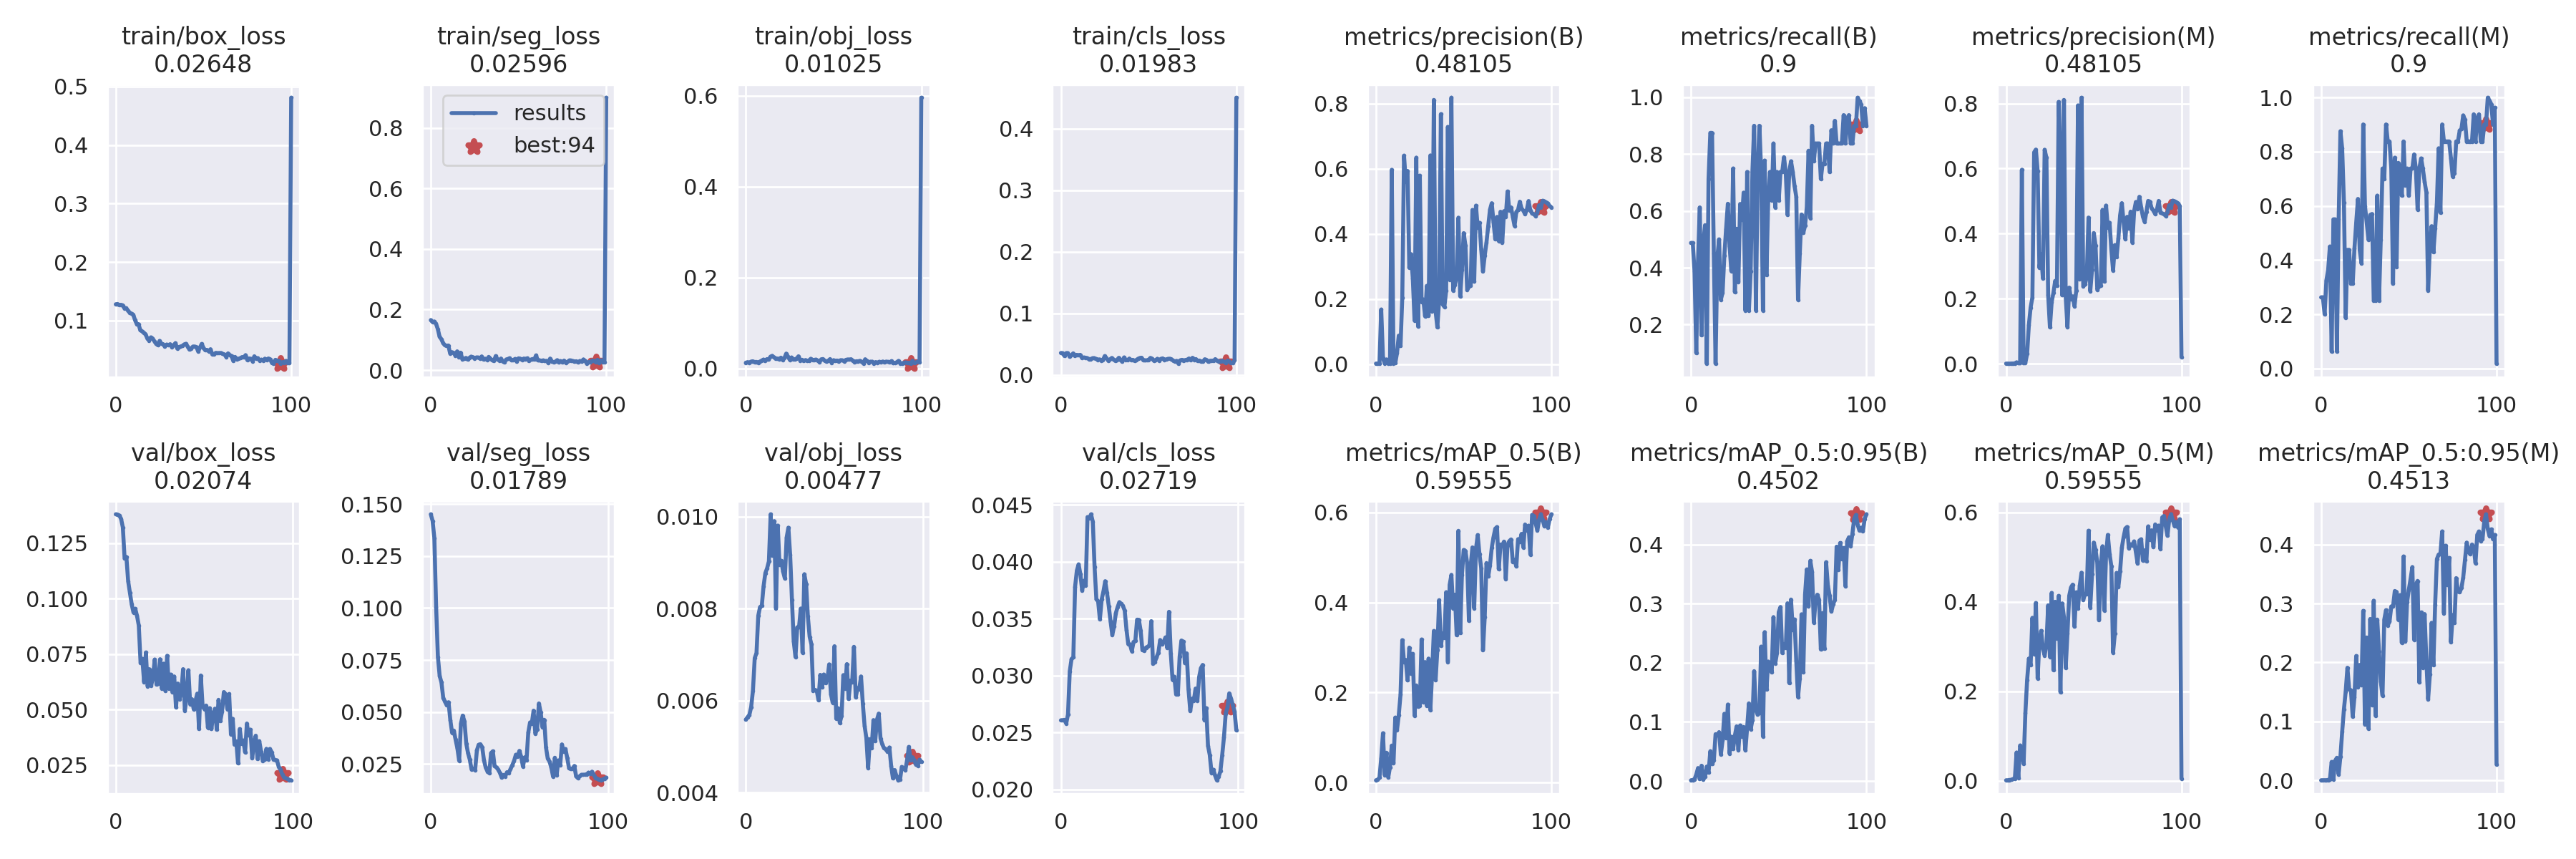

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

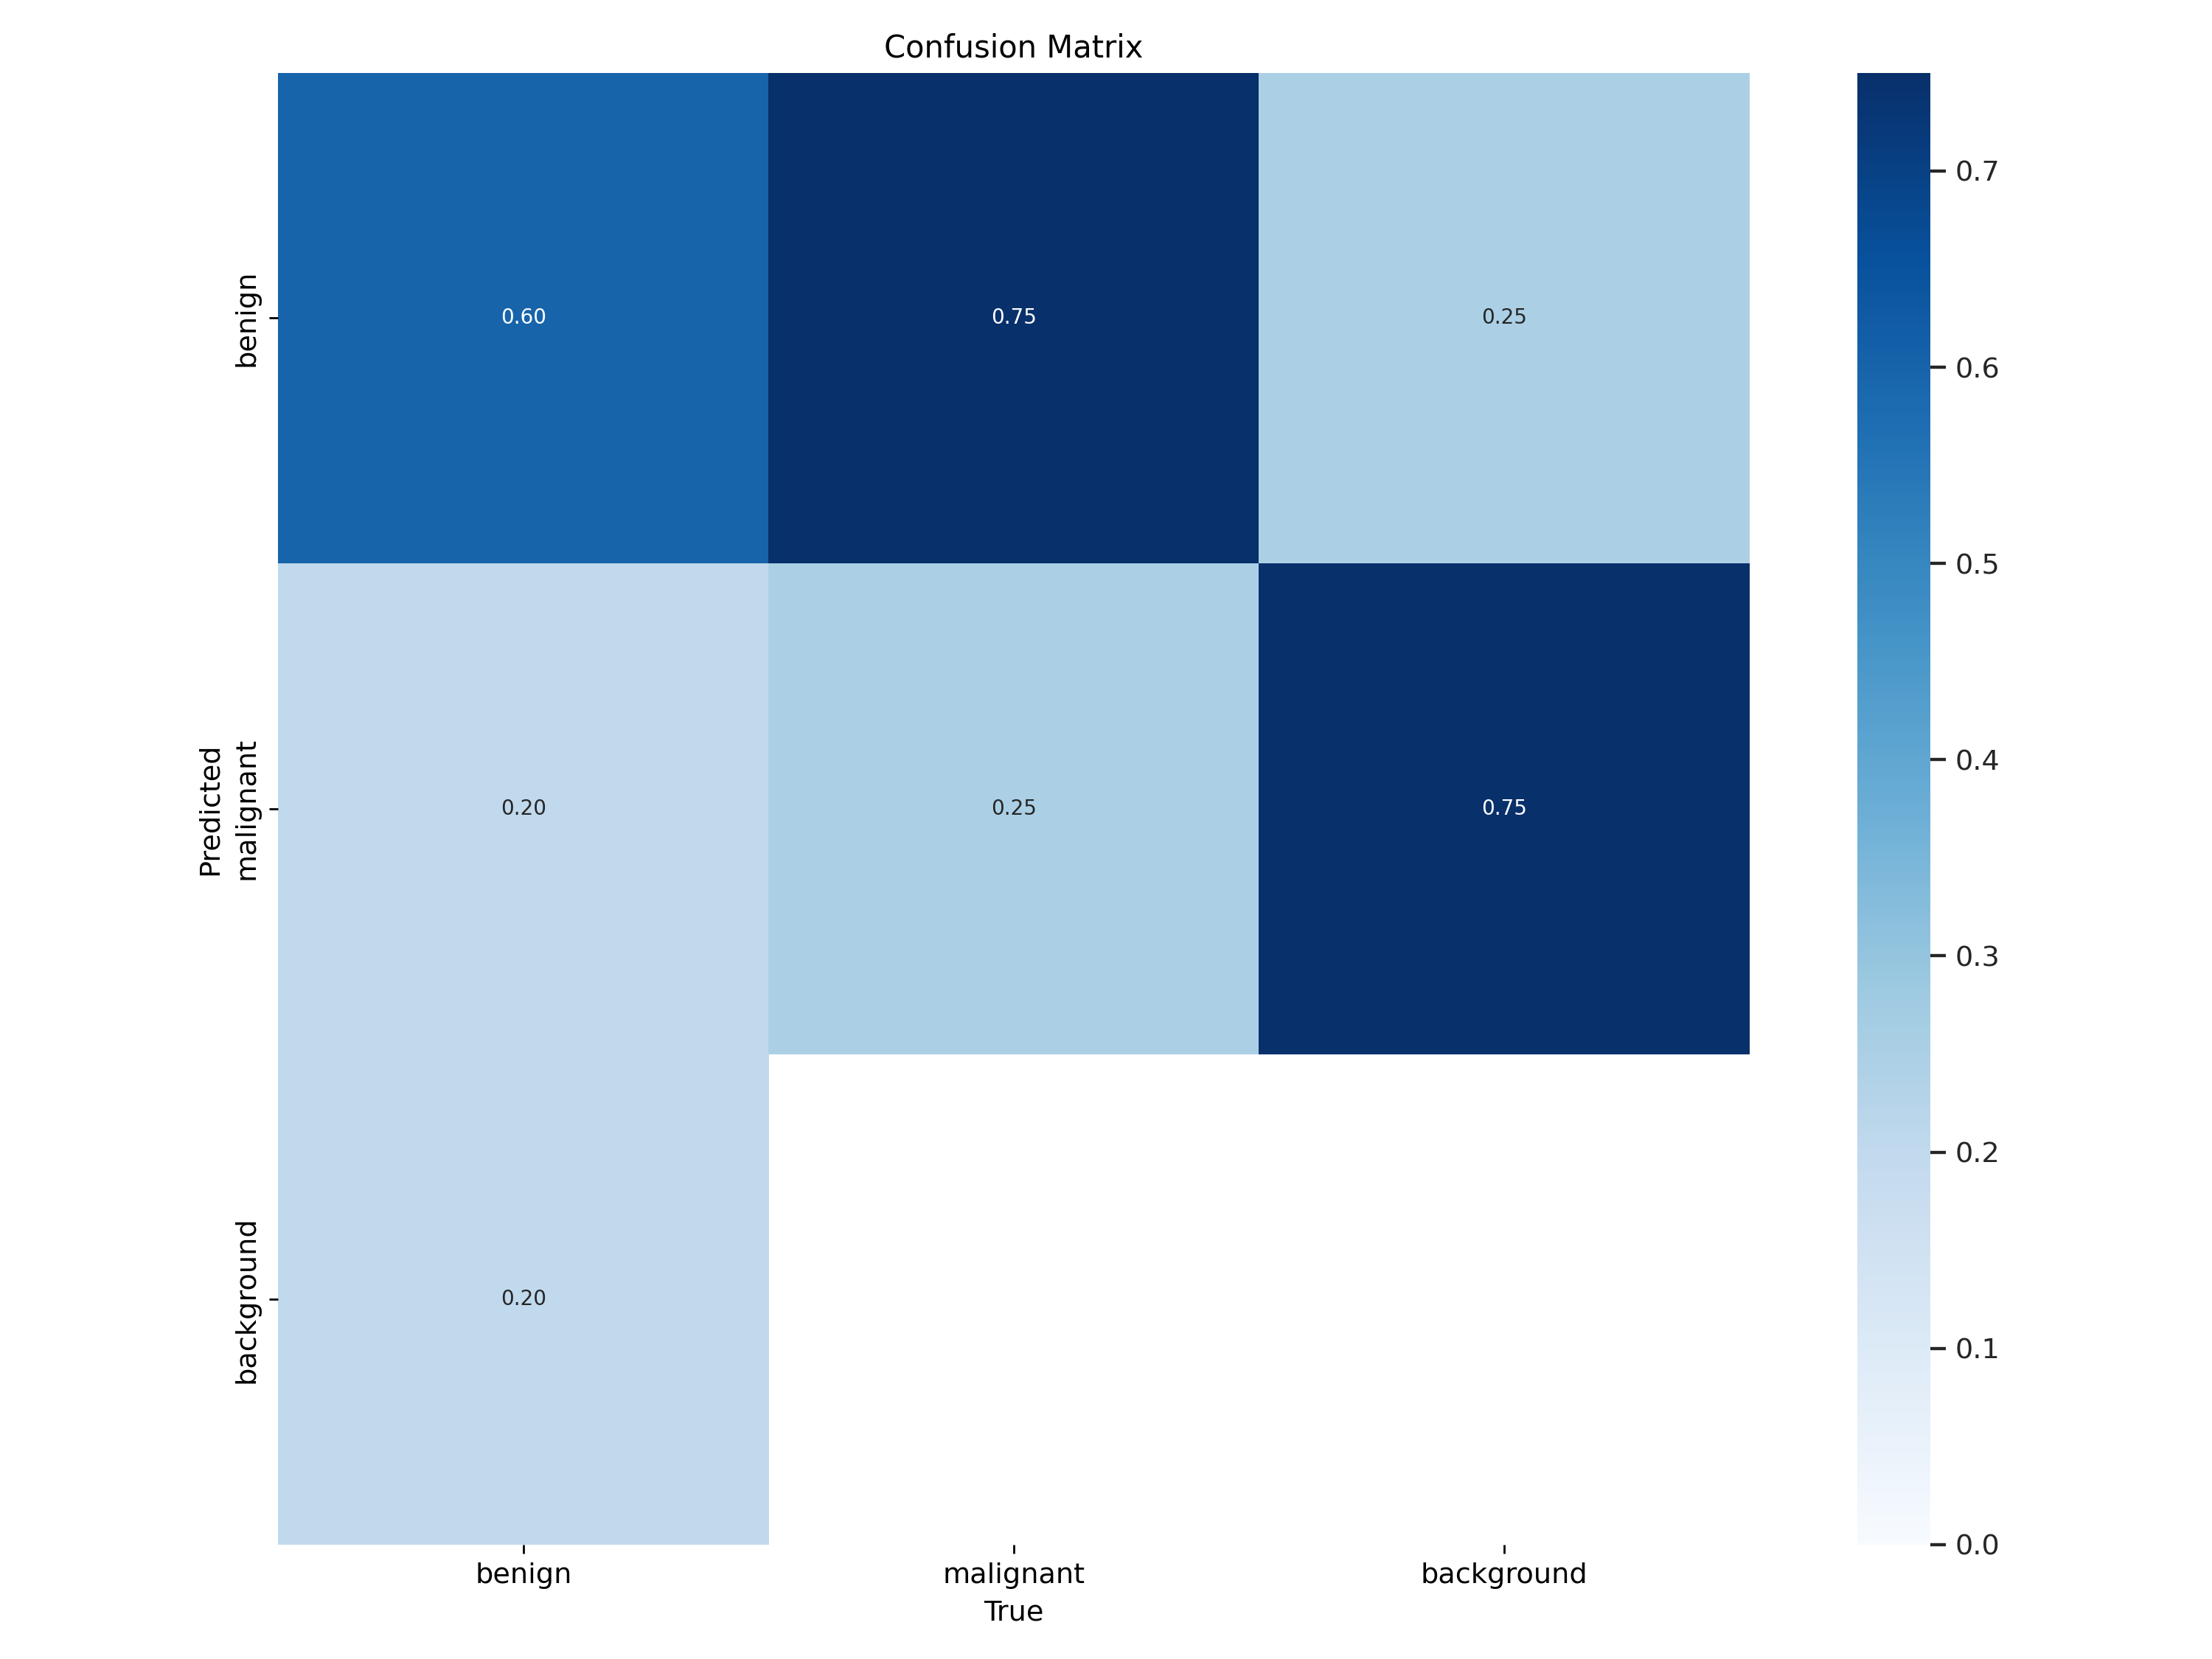

In [ ]:
display.Image(filename=f'/content/yolov5/runs/train-seg/custom-dataset/confusion_matrix.png', width=1200)

# 3. Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/Skin-cancer-1/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Skin-cancer-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.25it/s]
                   all         13         13      0.481        0.9      0

# 4. Infer With Your Custom Model

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")


/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029296_jpg.rf.753fe873d54d3441f790efb415e14307.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029296_jpg.rf.753fe873d54d3441f790efb415e14307.jpg: 320x320 2 malignants, 9.8ms
Speed: 0.3ms pre-process, 9.8ms infere

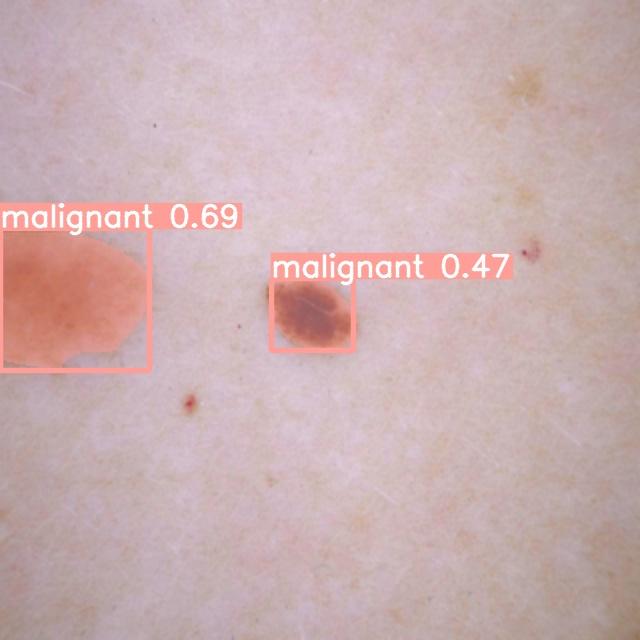

In [ ]:
i=0
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/28_jpg.rf.31cd48188853625f9cc7341831f836a4.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/28_jpg.rf.31cd48188853625f9cc7341831f836a4.jpg: 320x320 (no detections), 9.1ms
Speed: 0.3ms pre-process, 9.1ms inference, 0.4ms NMS pe

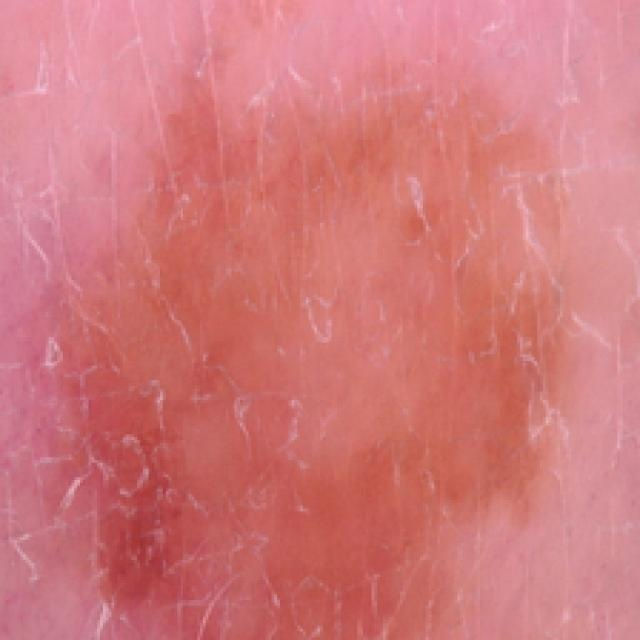

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=1
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029272_jpg.rf.7eca689bb6f8f3e85dcf696fb707c3f3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029272_jpg.rf.7eca689bb6f8f3e85dcf696fb707c3f3.jpg: 320x320 1 malignant, 8.3ms
Speed: 0.3ms pre-process, 8.3ms inferen

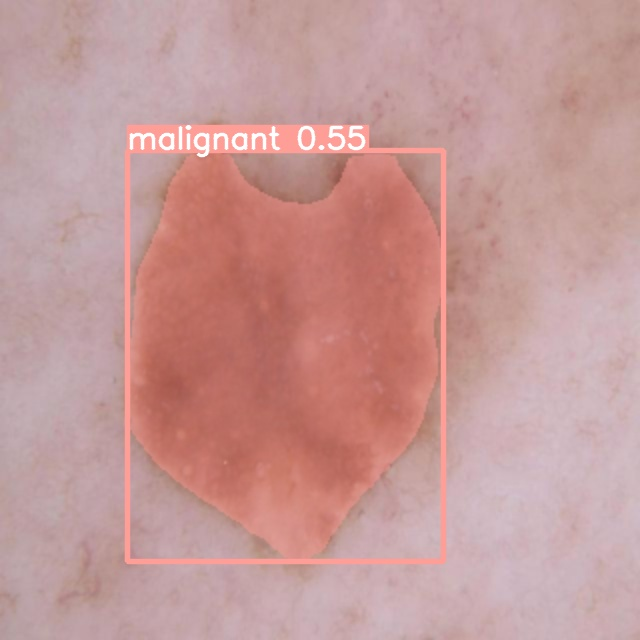

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=2
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029281_jpg.rf.662438ae06fa630f3663002d0670a8d1.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029281_jpg.rf.662438ae06fa630f3663002d0670a8d1.jpg: 320x320 1 malignant, 10.1ms
Speed: 0.4ms pre-process, 10.1ms infer

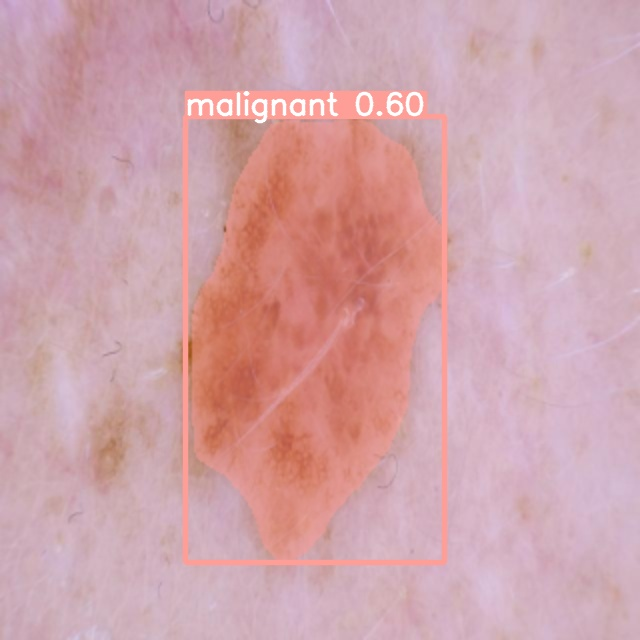

In [ ]:
i=3
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029268_jpg.rf.32e6dbb9341a41650da503449dee237e.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029268_jpg.rf.32e6dbb9341a41650da503449dee237e.jpg: 320x320 2 malignants, 8.4ms
Speed: 0.3ms pre-process, 8.4ms infere

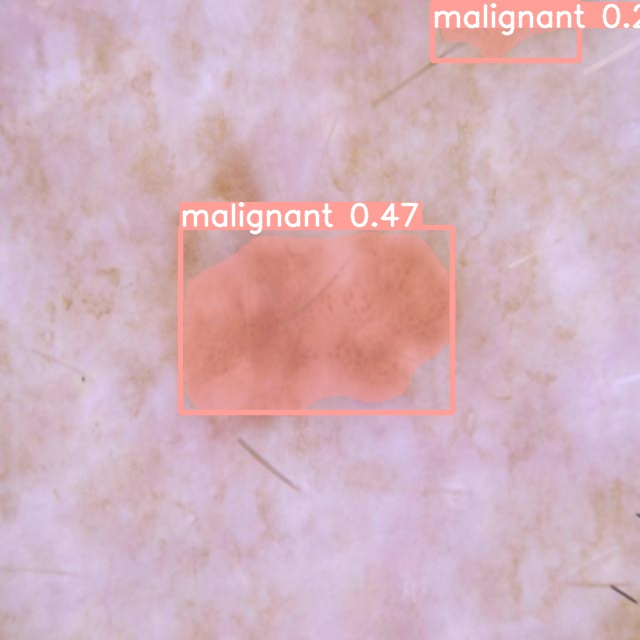

In [ ]:
i=4
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029280_jpg.rf.3b392bad91ef7db2cb0fa4cb52995bab.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029280_jpg.rf.3b392bad91ef7db2cb0fa4cb52995bab.jpg: 320x320 1 benign, 1 malignant, 9.3ms
Speed: 0.3ms pre-process, 9.3

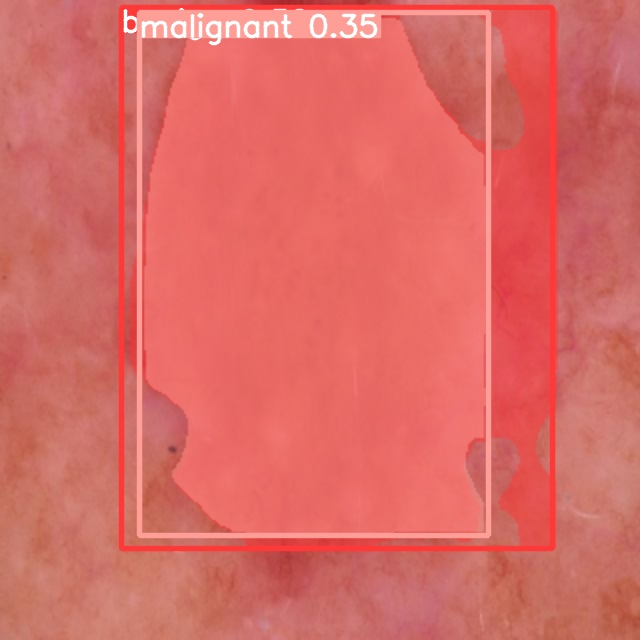

In [ ]:
i=5
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/20_jpg.rf.a4520daff02492c824842fa270b94759.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/20_jpg.rf.a4520daff02492c824842fa270b94759.jpg: 320x320 (no detections), 9.2ms
Speed: 0.3ms pre-process, 9.2ms inference, 0.7ms NMS pe

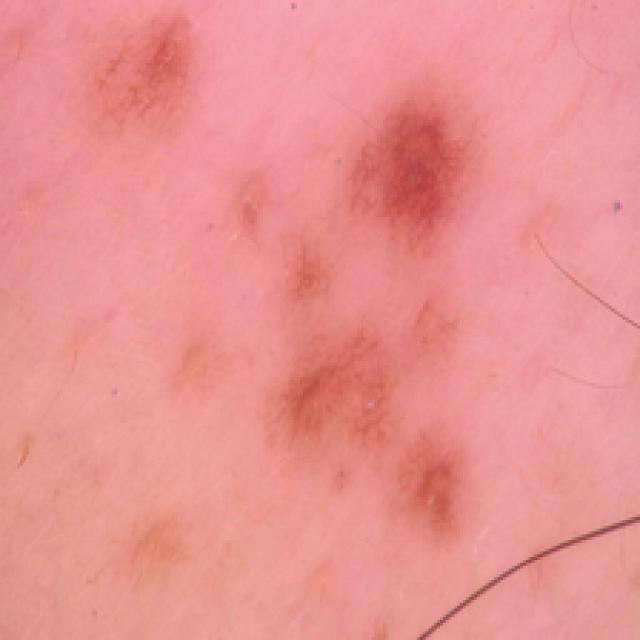

In [ ]:
i=6
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029270_jpg.rf.01510fecf303e4261f97c38dcd3bf262.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029270_jpg.rf.01510fecf303e4261f97c38dcd3bf262.jpg: 320x320 2 malignants, 8.8ms
Speed: 0.3ms pre-process, 8.8ms infere

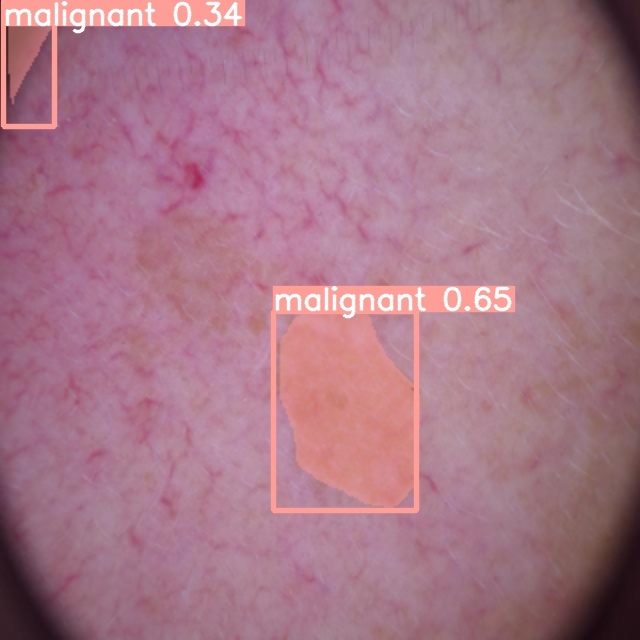

In [ ]:
i=7
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029301_jpg.rf.def0a09381ebcc6d42ebedfb57ba0e58.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029301_jpg.rf.def0a09381ebcc6d42ebedfb57ba0e58.jpg: 320x320 1 malignant, 8.8ms
Speed: 0.3ms pre-process, 8.8ms inferen

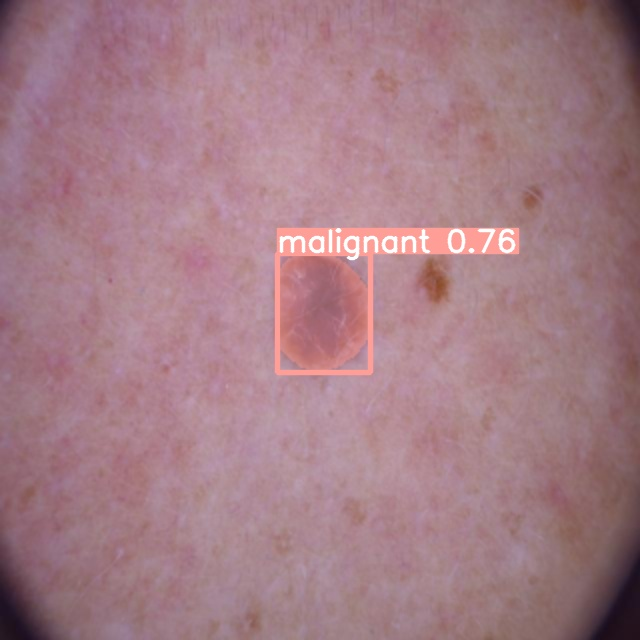

In [ ]:
i=8
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029271_jpg.rf.710616cbed2d600831354a337ae84c3a.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029271_jpg.rf.710616cbed2d600831354a337ae84c3a.jpg: 320x320 1 malignant, 10.2ms
Speed: 0.3ms pre-process, 10.2ms infer

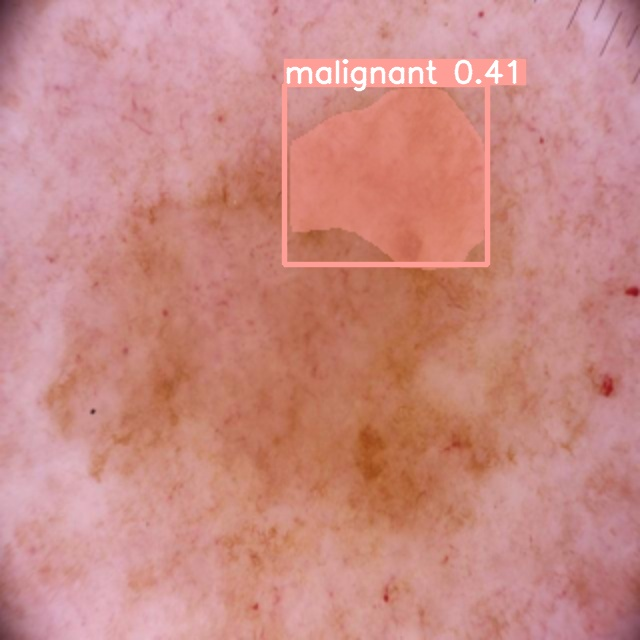

In [ ]:
i=9
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029267_jpg.rf.d884296427ea78586413d0ca983f34d3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029267_jpg.rf.d884296427ea78586413d0ca983f34d3.jpg: 320x320 1 malignant, 15.3ms
Speed: 0.4ms pre-process, 15.3ms infer

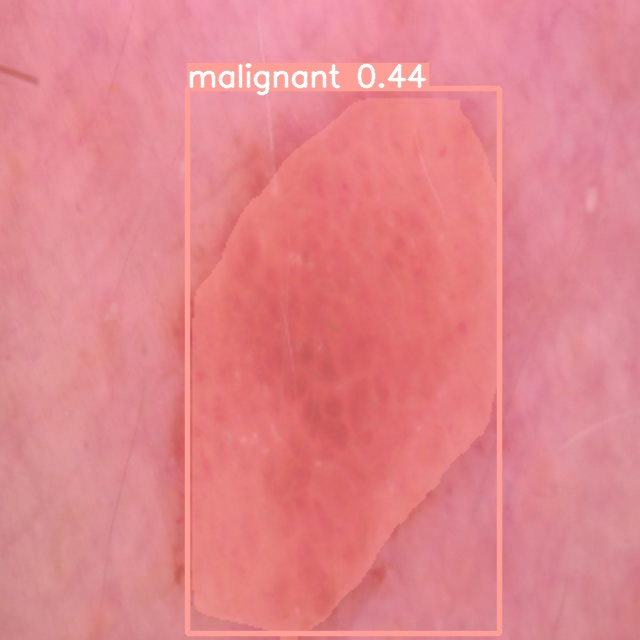

In [ ]:
i=10
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029295_jpg.rf.a5082ce8fd24badf3d6707dad3baaf0b.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029295_jpg.rf.a5082ce8fd24badf3d6707dad3baaf0b.jpg: 320x320 1 malignant, 9.3ms
Speed: 0.3ms pre-process, 9.3ms inferen

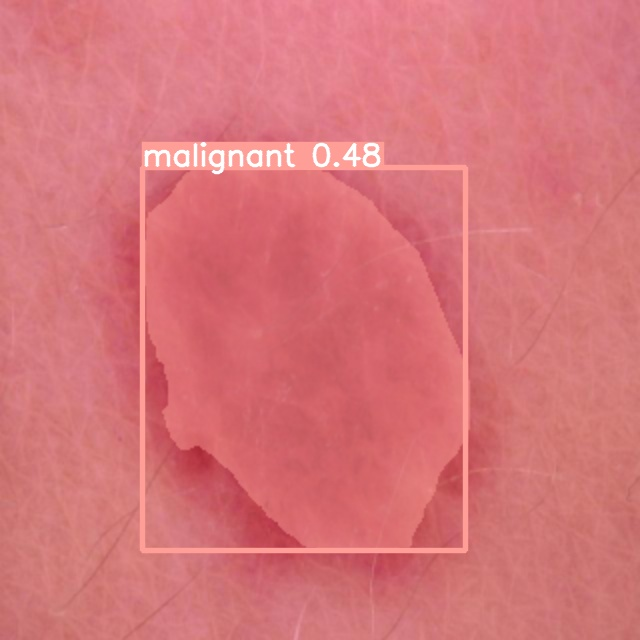

In [ ]:
i=11
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

In [ ]:
i=12
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029285_jpg.rf.356568d9f8961540e8378b01f9246612.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029285_jpg.rf.356568d9f8961540e8378b01f9246612.jpg: 320x320 1 malignant, 9.4ms
Speed: 0.3ms pre-process, 9.4ms inferen

# Training from scratch

In [ ]:
%cd {HOME}/yolov5 
display = utils.notebook_init()  # checks
!python segment/train.py --img 158 --batch 32 --epochs 100 --data {dataset.location}/data.yaml --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --name custom-dataset

YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.8/78.2 GB disk)
segment/train: weights=/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt, cfg=, data=/content/yolov5/Skin-cancer-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=32, imgsz=158, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, 

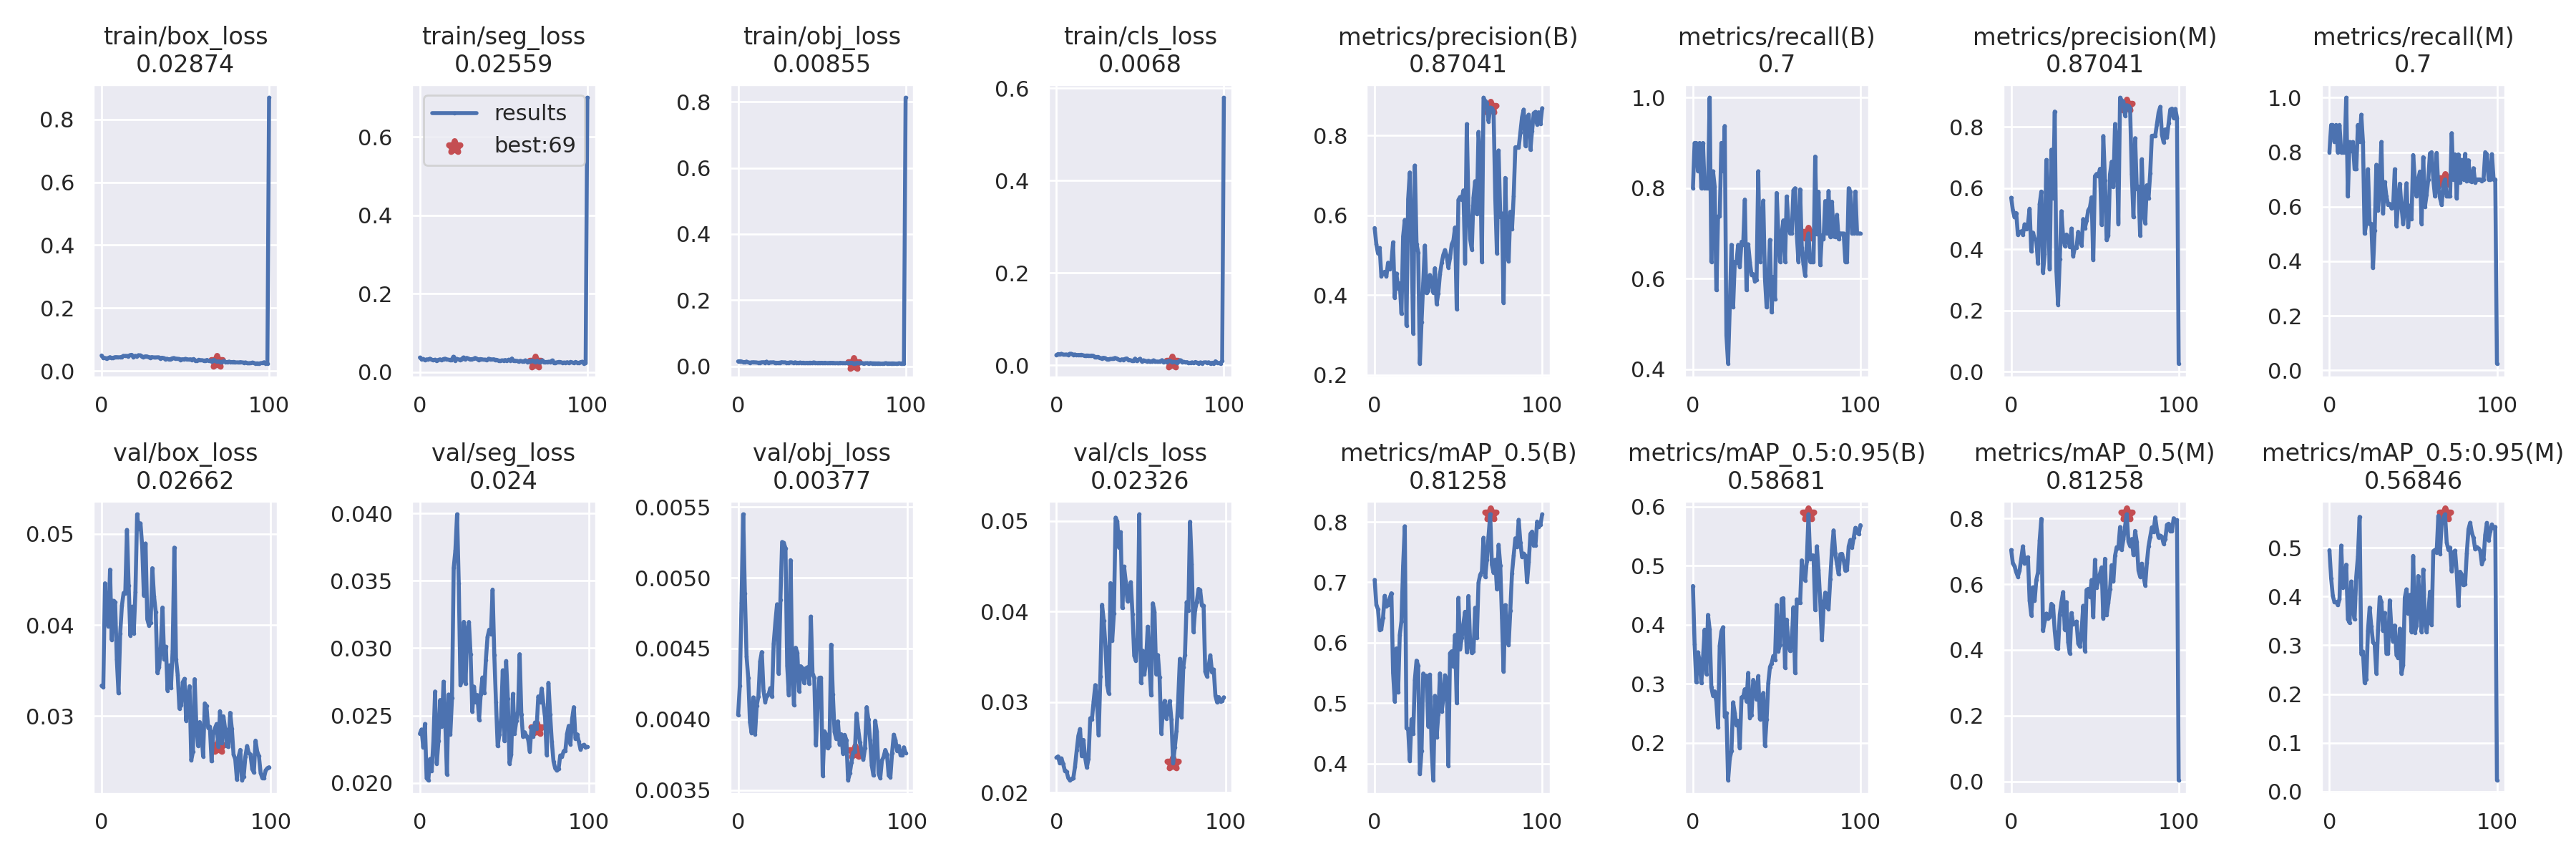

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset2/results.png', width=1200)

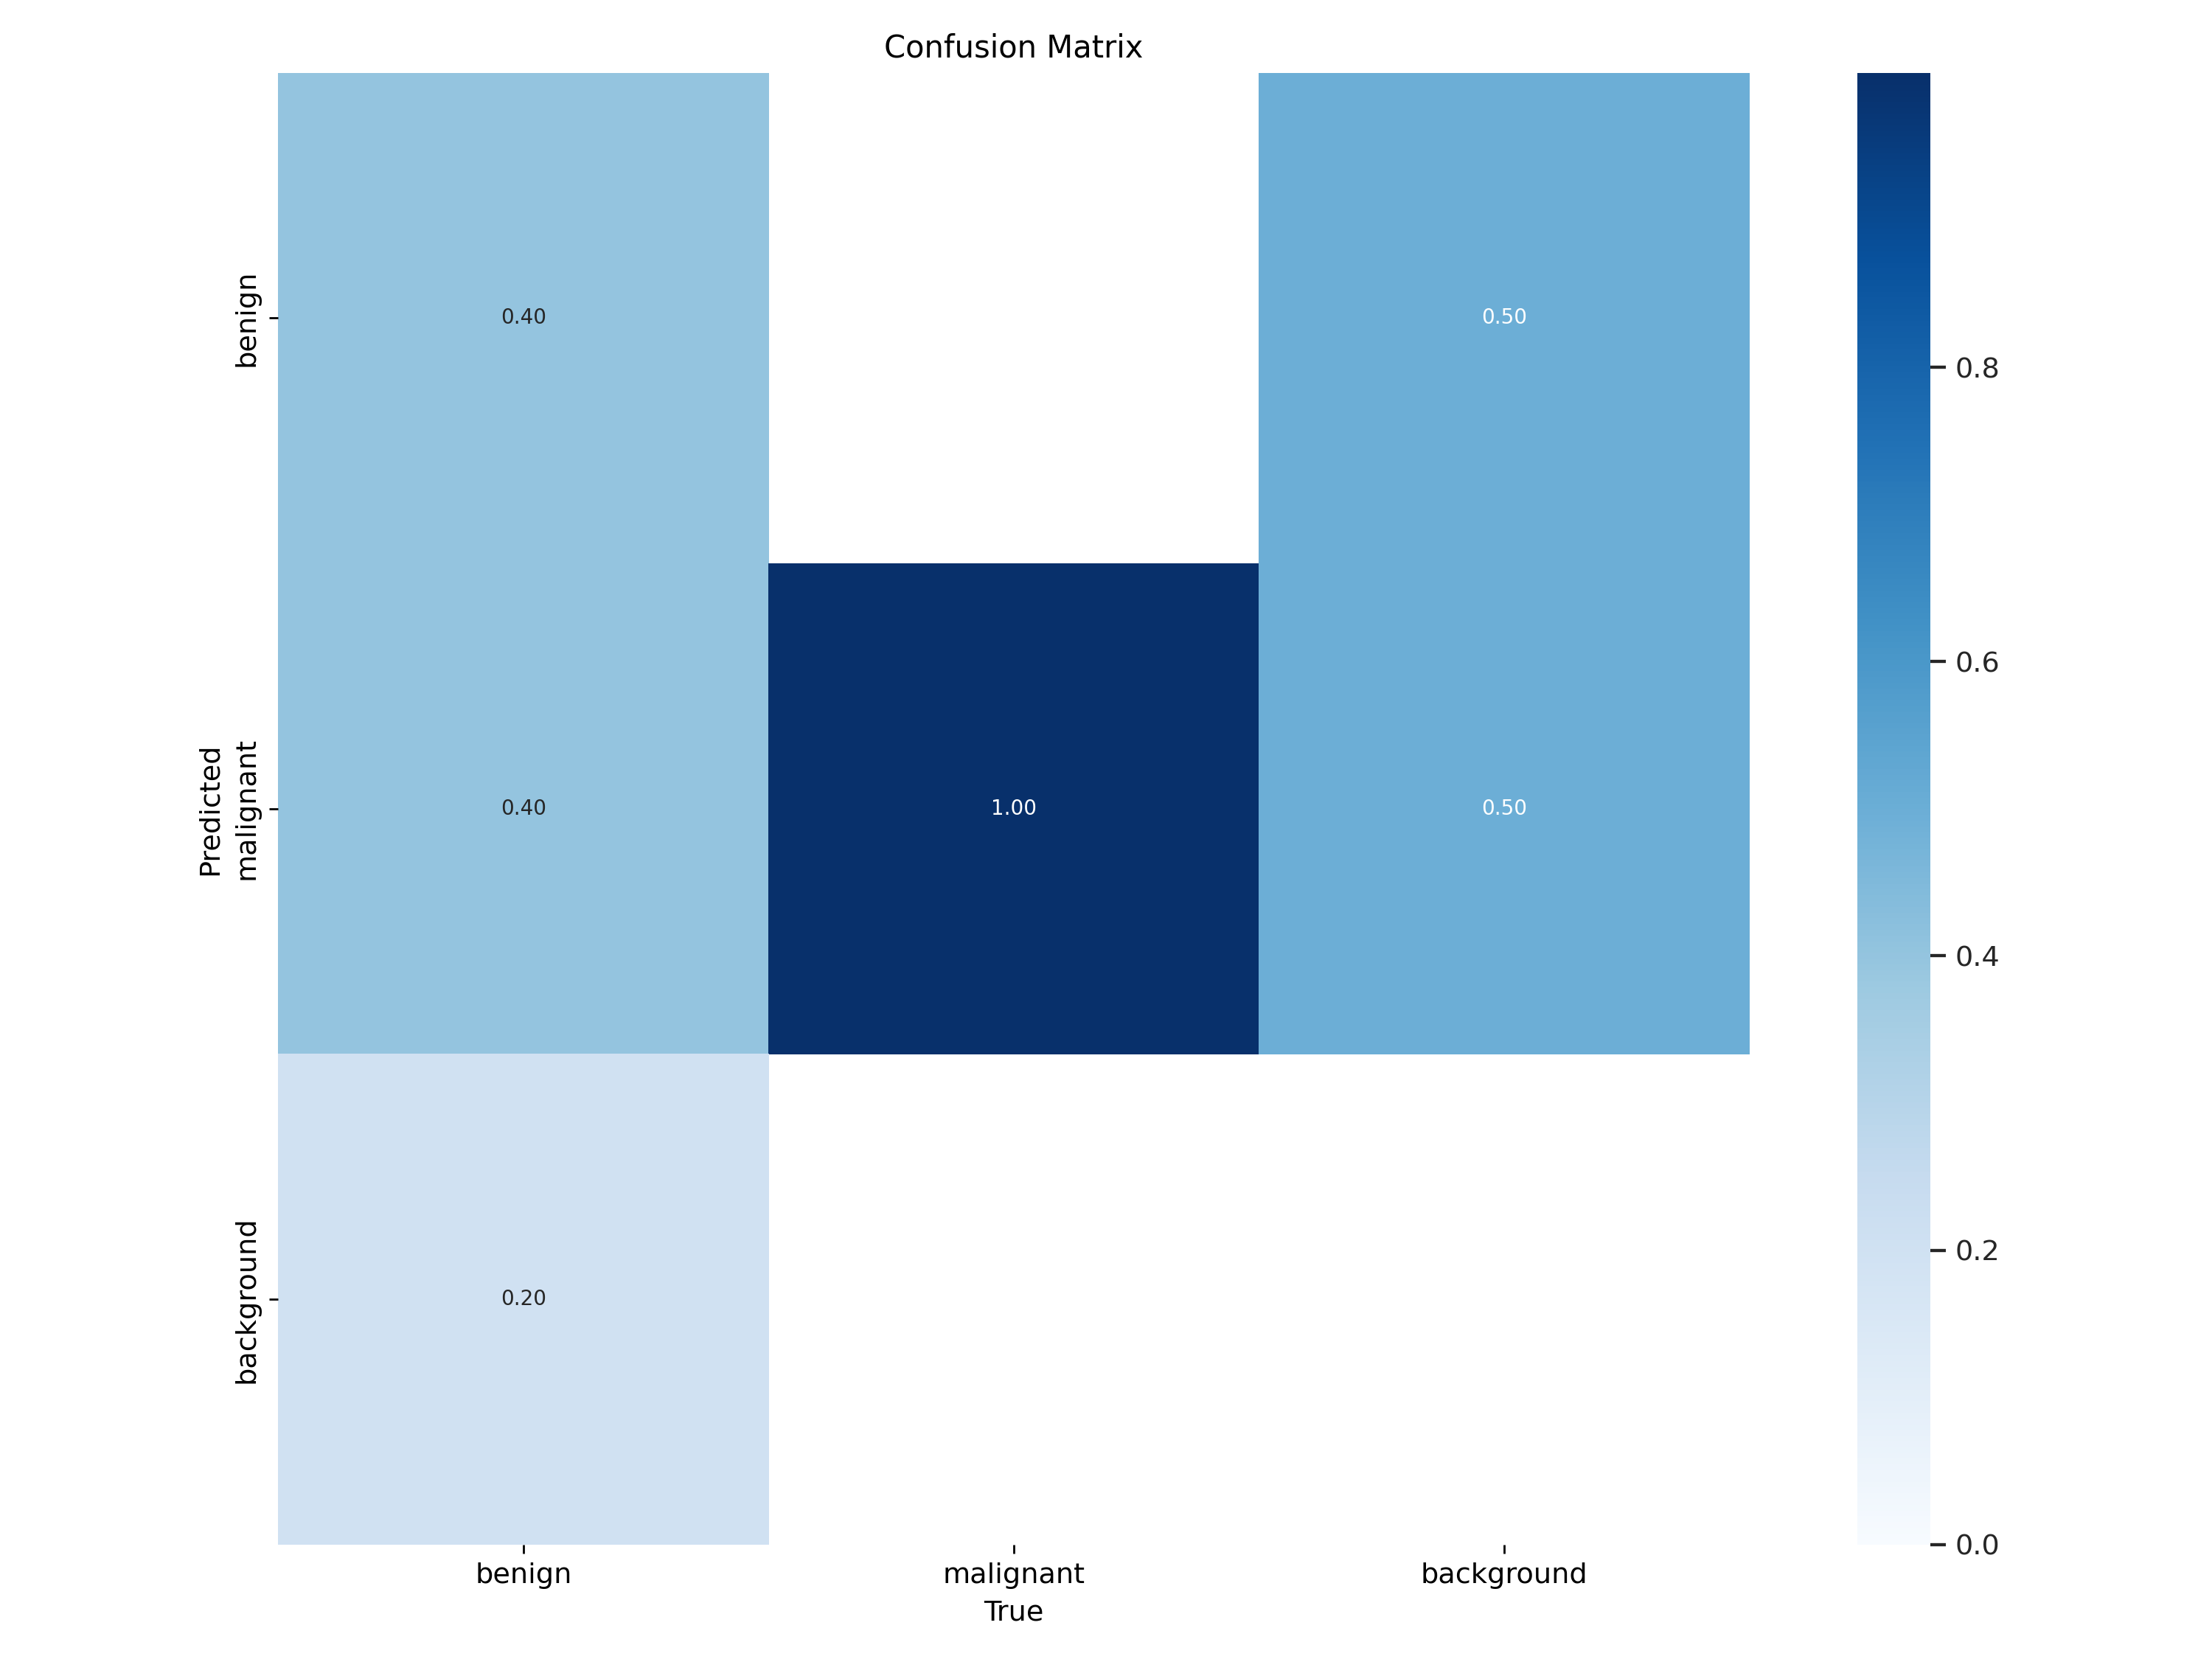

In [ ]:
display.Image(filename=f'/content/yolov5/runs/train-seg/custom-dataset2/confusion_matrix.png', width=1200)

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/Skin-cancer-1/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Skin-cancer-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.11it/s]
                   all         13         13      0.518      0.838      

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=0
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
#!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom/{example_image_name}", width=600)

/content/yolov5


Truth: Malignant

/content/yolov5


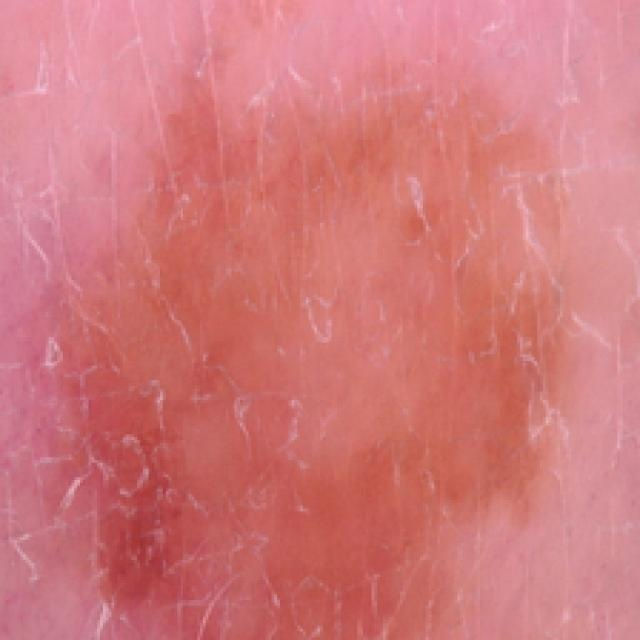

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=1
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
#!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+1}/{example_image_name}", width=600)

Truth : Benign

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=2
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029272_jpg.rf.7eca689bb6f8f3e85dcf696fb707c3f3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029272_jpg.rf.7eca689bb6f8f3e85dcf696fb707c3f3.jpg: 320x320 1 benign, 8.7ms
Speed: 0.3ms pre-process, 8.7ms inference, 1.6ms 

Truth : Malignant

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029281_jpg.rf.662438ae06fa630f3663002d0670a8d1.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029281_jpg.rf.662438ae06fa630f3663002d0670a8d1.jpg: 320x320 1 malignant, 8.8ms
Speed: 0.3ms pre-process, 8.8ms inference, 1.6

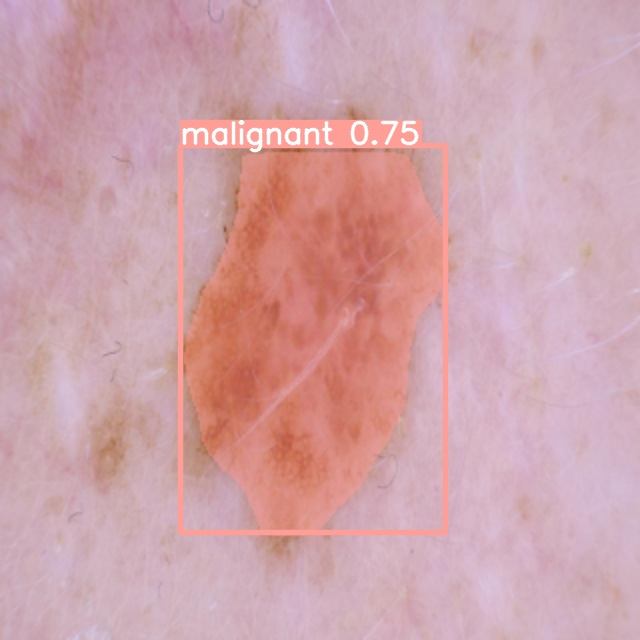

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=3
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+1}/{example_image_name}", width=600)

Truth: Malignant

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=4
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029268_jpg.rf.32e6dbb9341a41650da503449dee237e.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029268_jpg.rf.32e6dbb9341a41650da503449dee237e.jpg: 320x320 2 benigns, 8.7ms
Speed: 0.3ms pre-process, 8.7ms inference, 1.4ms

Truth : Malignant

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=5
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029280_jpg.rf.3b392bad91ef7db2cb0fa4cb52995bab.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029280_jpg.rf.3b392bad91ef7db2cb0fa4cb52995bab.jpg: 320x320 1 malignant, 8.8ms
Speed: 0.3ms pre-process, 8.8ms inference, 1.5

Truth: Malignant

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=6
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/20_jpg.rf.a4520daff02492c824842fa270b94759.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/20_jpg.rf.a4520daff02492c824842fa270b94759.jpg: 320x320 2 benigns, 9.1ms
Speed: 0.3ms pre-process, 9.1ms inference, 1.5ms NMS per image at sh

Truth : Benign

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029270_jpg.rf.01510fecf303e4261f97c38dcd3bf262.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029270_jpg.rf.01510fecf303e4261f97c38dcd3bf262.jpg: 320x320 1 benign, 4 malignants, 8.7ms
Speed: 0.3ms pre-process, 8.7ms inf

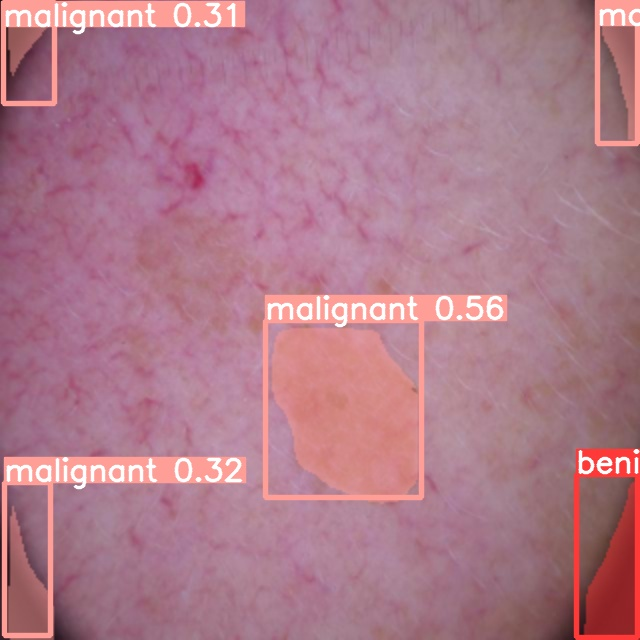

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=7
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+2}/{example_image_name}", width=600)

Truth : Benign

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029271_jpg.rf.710616cbed2d600831354a337ae84c3a.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029271_jpg.rf.710616cbed2d600831354a337ae84c3a.jpg: 320x320 (no detections), 17.2ms
Speed: 0.5ms pre-process, 17.2ms inferenc

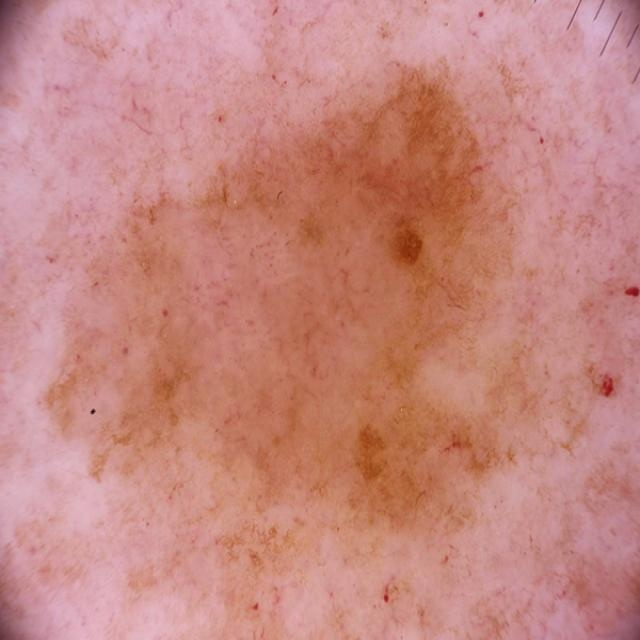

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=9
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+2}/{example_image_name}", width=600)

Truth: Malignant

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029267_jpg.rf.d884296427ea78586413d0ca983f34d3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029267_jpg.rf.d884296427ea78586413d0ca983f34d3.jpg: 320x320 1 benign, 9.3ms
Speed: 0.3ms pre-process, 9.3ms inference, 1.5ms 

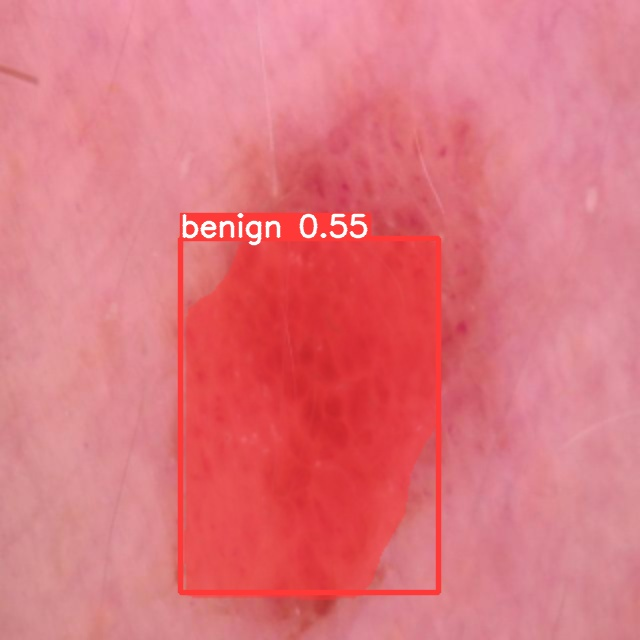

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=10
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+2}/{example_image_name}", width=600)

Truth : benign

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029295_jpg.rf.a5082ce8fd24badf3d6707dad3baaf0b.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029295_jpg.rf.a5082ce8fd24badf3d6707dad3baaf0b.jpg: 320x320 1 benign, 1 malignant, 8.8ms
Speed: 0.3ms pre-process, 8.8ms infe

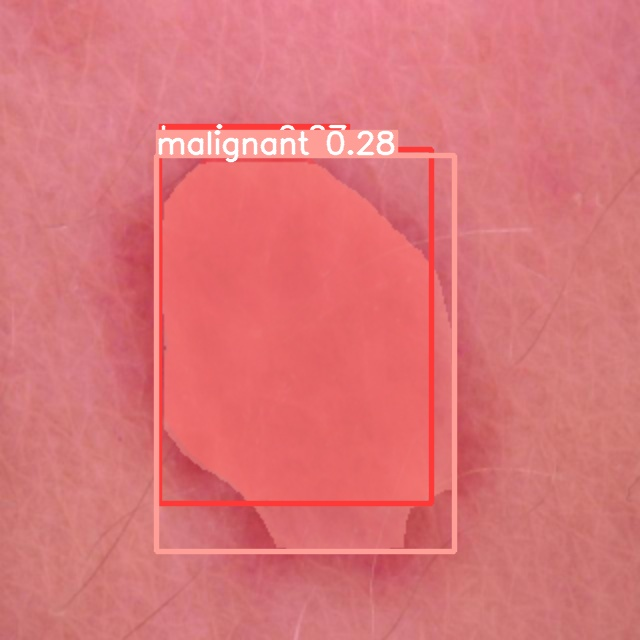

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=11
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+2}/{example_image_name}", width=600)

Truth : malignant

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset2/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029285_jpg.rf.356568d9f8961540e8378b01f9246612.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029285_jpg.rf.356568d9f8961540e8378b01f9246612.jpg: 320x320 2 benigns, 9.0ms
Speed: 0.3ms pre-process, 9.0ms inference, 1.6ms

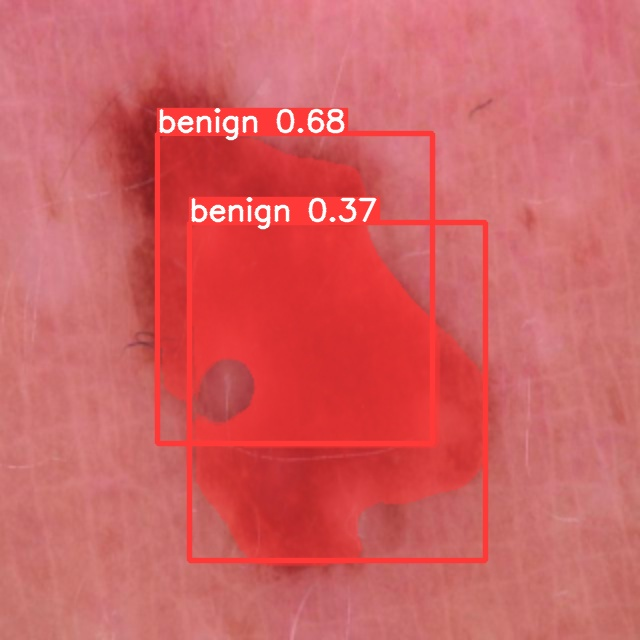

In [ ]:
if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=12
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset2/weights/best.pt --source {example_image_path} --name custom
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom{i+2}/{example_image_name}", width=600)

Truth : malignant

# 1000 epoch training

In [ ]:
%cd {HOME}/yolov5 
display = utils.notebook_init()  # checks
!python segment/train.py --img 158 --batch 32 --epochs 1000 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom

YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.7/78.2 GB disk)
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/Skin-cancer-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1000, batch_size=32, imgsz=158, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=custom, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, a

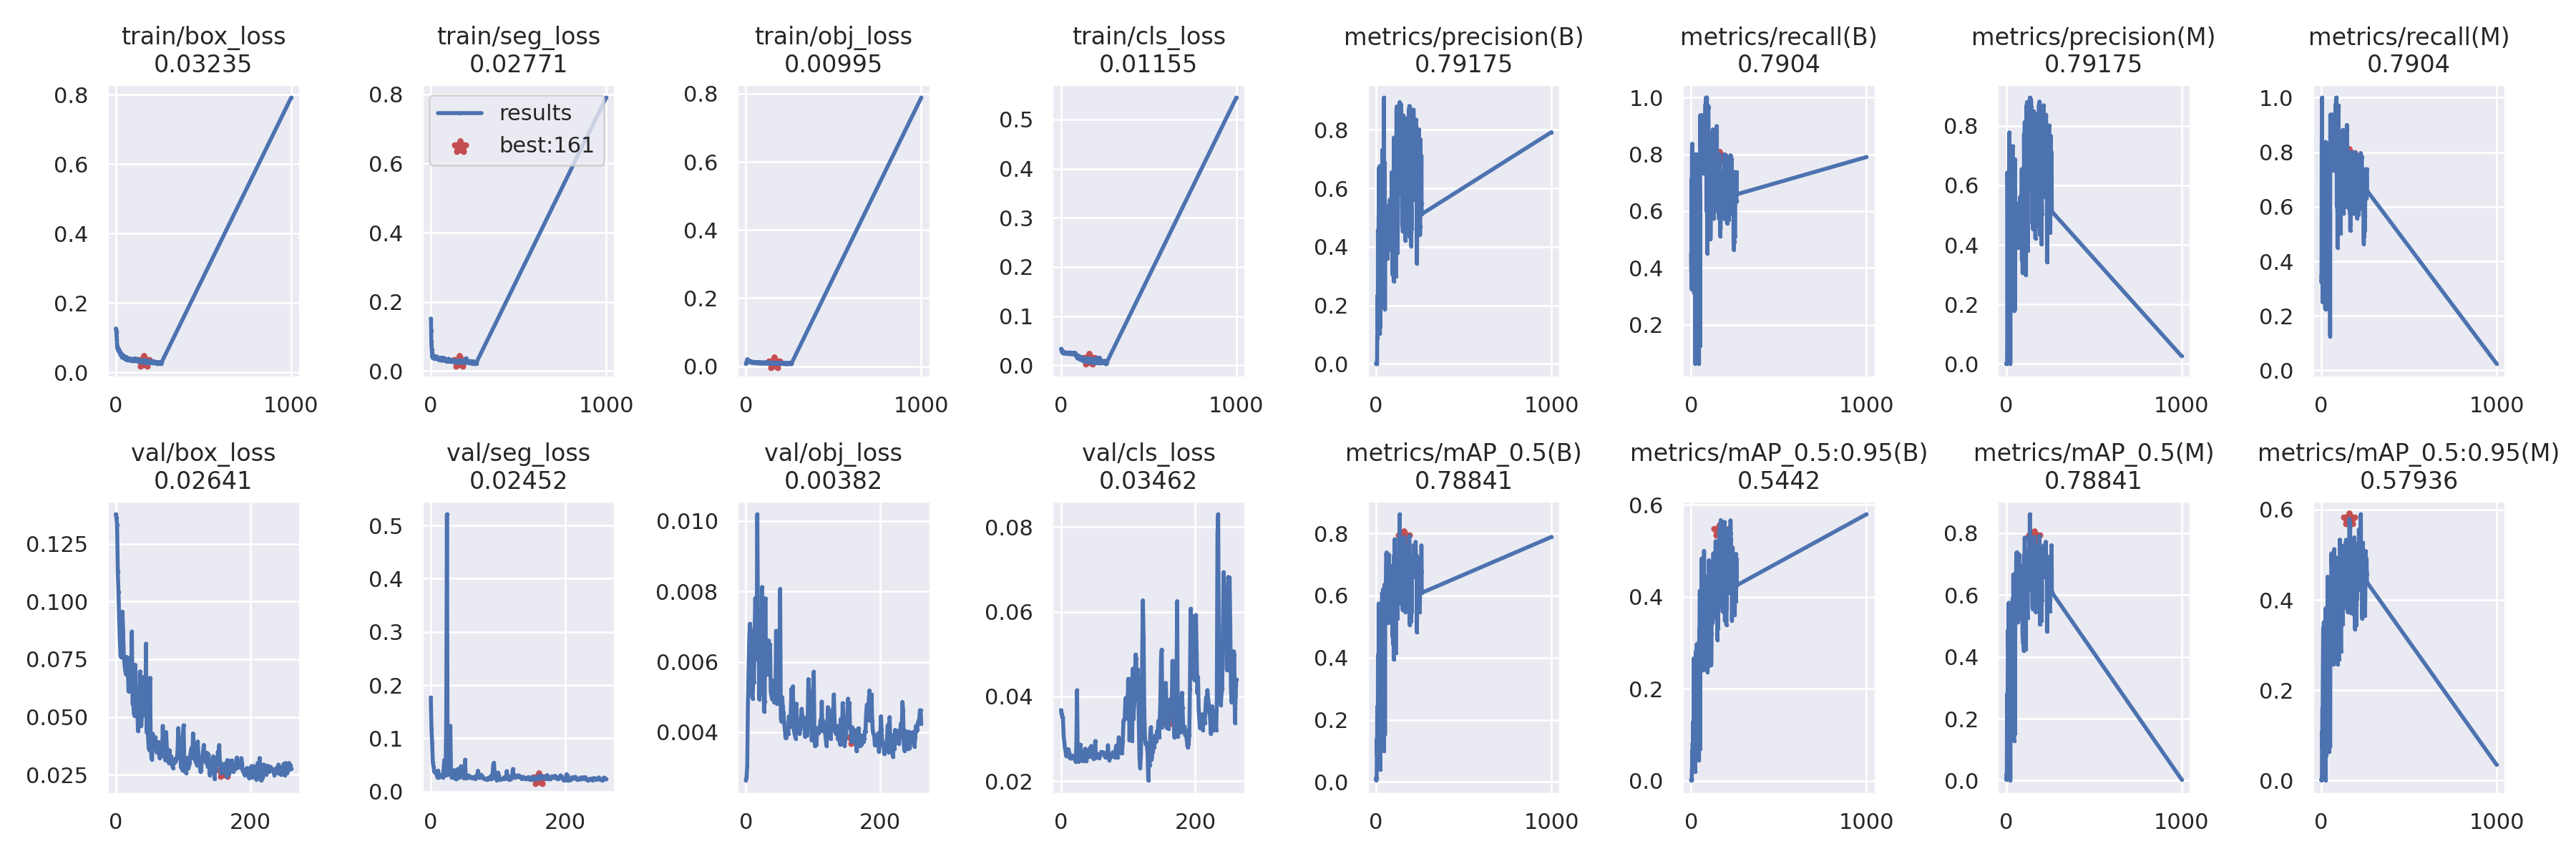

In [ ]:
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom/results.png', width=1200)

In [ ]:
display.Image(filename=f'/content/yolov5/runs/train-seg/custom/confusion_matrix.png', width=1200)

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom

/content/yolov5
segment/val: data=/content/yolov5/Skin-cancer-1/data.yaml, weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
val: Scanning /content/yolov5/Skin-cancer-1/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100% 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.24it/s]
                   all         13         13      0.269      0.637      0.357      0.194 

In [28]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")

i=0
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 158 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name image{i}
display.Image(filename=f'{HOME}/yolov5/runs/predict-seg/image{i}/{example_image_name}', width=1200)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029296_jpg.rf.753fe873d54d3441f790efb415e14307.jpg, data=data/coco128.yaml, imgsz=[158, 158], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=image0, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Traceback (most recent call last):
  File "segment/predict.py", line 284, in <module>
    main(opt)
  File "segment/predict.py", line 279, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context


FileNotFoundError: ignored

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029296_jpg.rf.753fe873d54d3441f790efb415e14307.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029296_jpg.rf.753fe873d54d3441f790efb415e14307.jpg: 320x320 1 benign, 3 malignants, 8.9ms
Speed: 0.3ms pre-process, 8.9ms infe

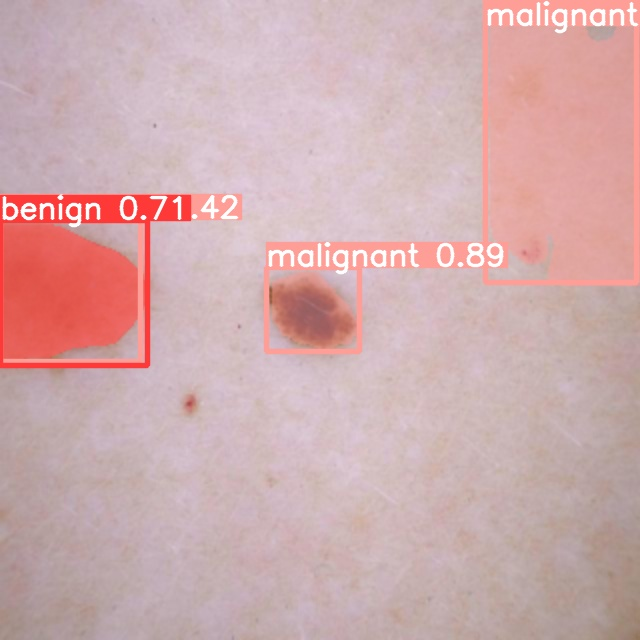

In [30]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
i=0
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

In [ ]:
i=1
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i}/{example_image_name}", width=600)

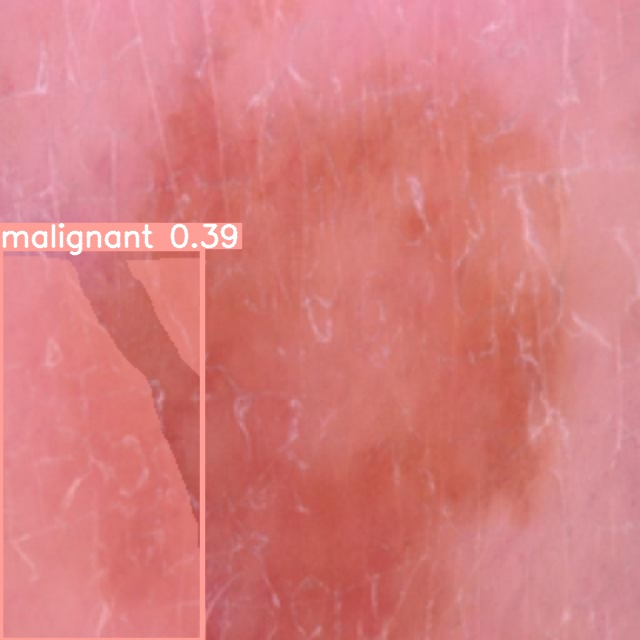

In [32]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029272_jpg.rf.7eca689bb6f8f3e85dcf696fb707c3f3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029272_jpg.rf.7eca689bb6f8f3e85dcf696fb707c3f3.jpg: 320x320 1 benign, 3 malignants, 15.4ms
Speed: 0.4ms pre-process, 15.4ms in

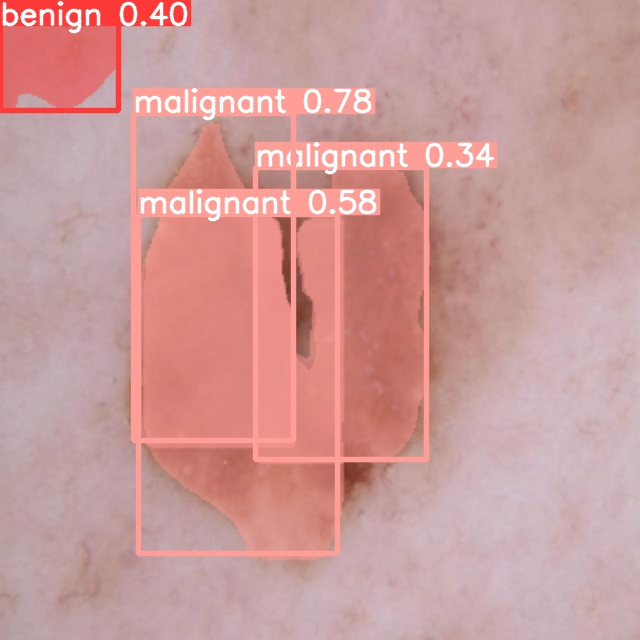

In [33]:
i=2
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029281_jpg.rf.662438ae06fa630f3663002d0670a8d1.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029281_jpg.rf.662438ae06fa630f3663002d0670a8d1.jpg: 320x320 2 benigns, 1 malignant, 16.3ms
Speed: 1.1ms pre-process, 16.3ms in

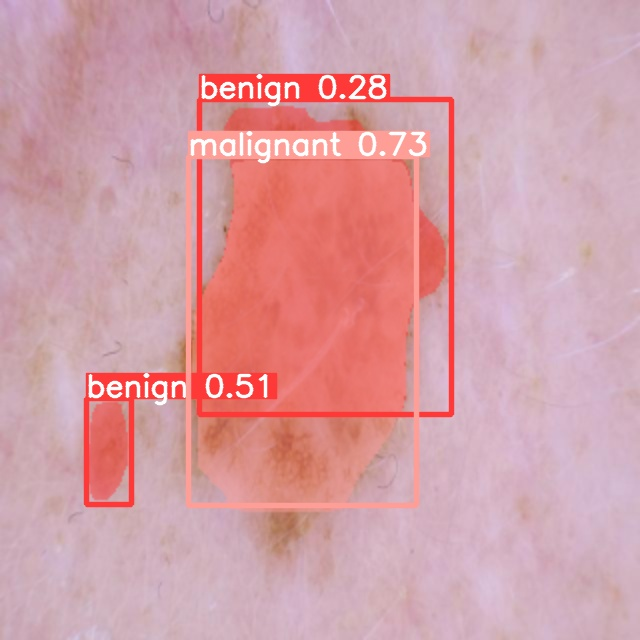

In [34]:
i=3
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029268_jpg.rf.32e6dbb9341a41650da503449dee237e.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029268_jpg.rf.32e6dbb9341a41650da503449dee237e.jpg: 320x320 1 benign, 2 malignants, 8.9ms
Speed: 0.3ms pre-process, 8.9ms infe

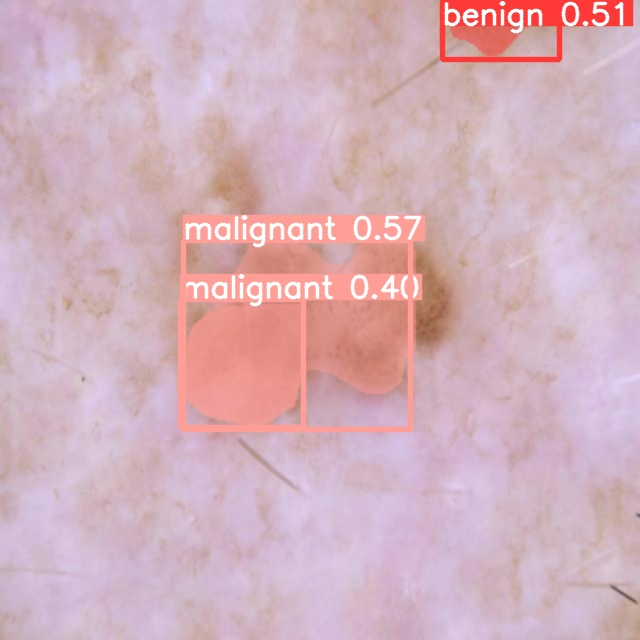

In [35]:
i=4
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029280_jpg.rf.3b392bad91ef7db2cb0fa4cb52995bab.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029280_jpg.rf.3b392bad91ef7db2cb0fa4cb52995bab.jpg: 320x320 1 benign, 1 malignant, 8.7ms
Speed: 0.3ms pre-process, 8.7ms infer

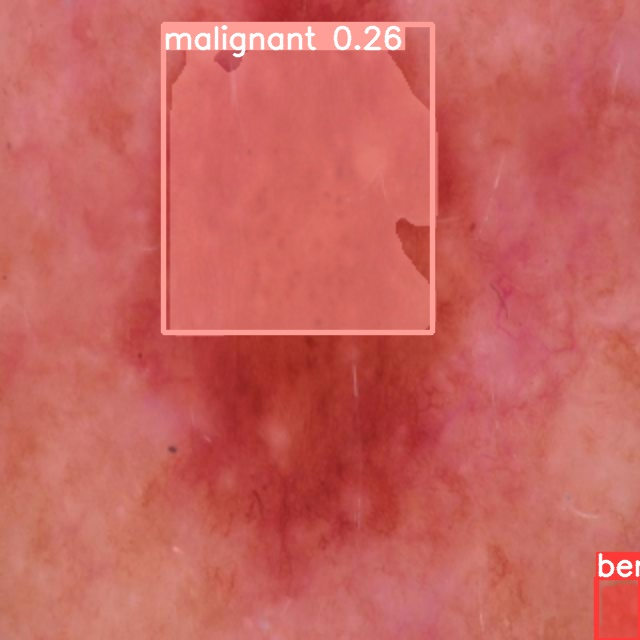

In [36]:
i=5
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/20_jpg.rf.a4520daff02492c824842fa270b94759.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/20_jpg.rf.a4520daff02492c824842fa270b94759.jpg: 320x320 1 benign, 3 malignants, 9.1ms
Speed: 0.3ms pre-process, 9.1ms inference, 1.6ms NMS per

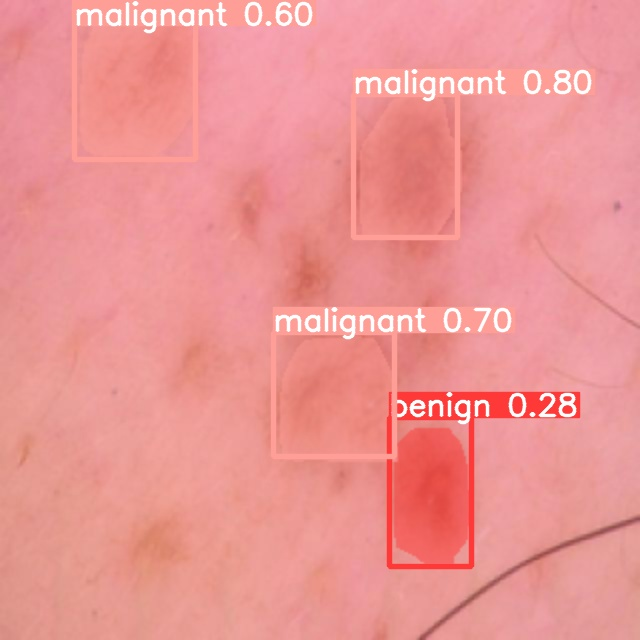

In [37]:
i=6
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

In [38]:
i=7
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029270_jpg.rf.01510fecf303e4261f97c38dcd3bf262.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029270_jpg.rf.01510fecf303e4261f97c38dcd3bf262.jpg: 320x320 2 benigns, 2 malignants, 12.9ms
Speed: 0.3ms pre-process, 12.9ms i

In [39]:
i=8
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029301_jpg.rf.def0a09381ebcc6d42ebedfb57ba0e58.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029301_jpg.rf.def0a09381ebcc6d42ebedfb57ba0e58.jpg: 320x320 3 benigns, 1 malignant, 9.0ms
Speed: 0.3ms pre-process, 9.0ms infe

In [40]:
i=9
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029271_jpg.rf.710616cbed2d600831354a337ae84c3a.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029271_jpg.rf.710616cbed2d600831354a337ae84c3a.jpg: 320x320 1 benign, 4 malignants, 11.0ms
Speed: 1.4ms pre-process, 11.0ms in

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029267_jpg.rf.d884296427ea78586413d0ca983f34d3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029267_jpg.rf.d884296427ea78586413d0ca983f34d3.jpg: 320x320 1 malignant, 9.4ms
Speed: 0.3ms pre-process, 9.4ms inference, 1.7m

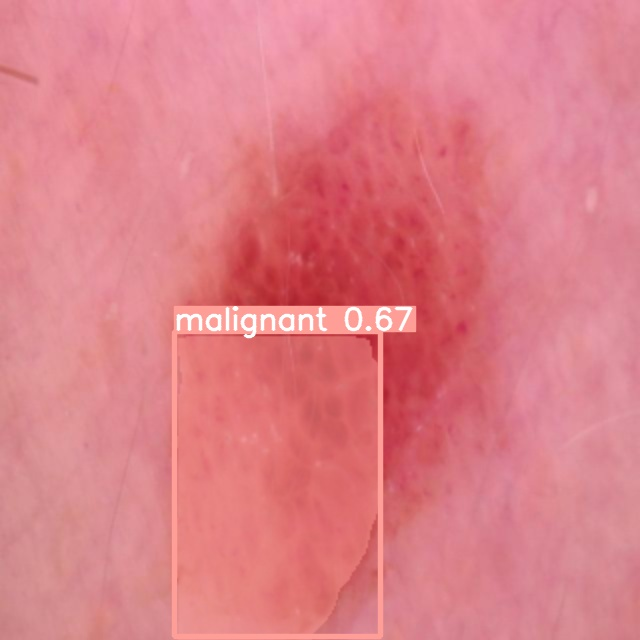

In [41]:
i=10
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

In [42]:
i=11
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029295_jpg.rf.a5082ce8fd24badf3d6707dad3baaf0b.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029295_jpg.rf.a5082ce8fd24badf3d6707dad3baaf0b.jpg: 320x320 4 malignants, 15.3ms
Speed: 0.4ms pre-process, 15.3ms inference, 2

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom/weights/best.pt'], source=/content/yolov5/Skin-cancer-1/test/images/ISIC_0029285_jpg.rf.356568d9f8961540e8378b01f9246612.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-97-gfa4bdbe Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 165 layers, 7401119 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /content/yolov5/Skin-cancer-1/test/images/ISIC_0029285_jpg.rf.356568d9f8961540e8378b01f9246612.jpg: 320x320 2 malignants, 8.7ms
Speed: 0.3ms pre-process, 8.7ms inference, 1.5

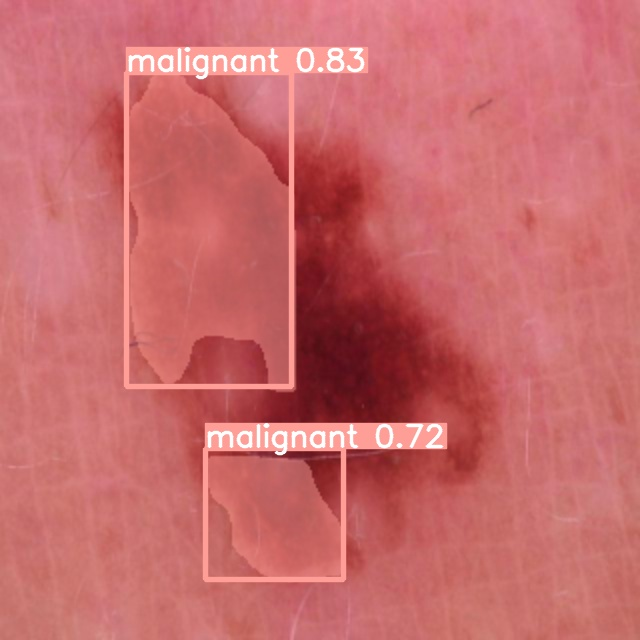

In [43]:
i=12
example_image_name = os.listdir(split_path)[i]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset{i+1}/{example_image_name}", width=600)